Bethe ansatz solver for the inverse square potential.

Set up

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 20 21:31:20 2022

@author: Darren
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc
from scipy import optimize

#Size of the box
boxSize = 100
#Density d = N/L, N is the number of particles in the system
densities = np.linspace(0, 3.5, 100)

#The integers/quantum numbers
def ints(N):
    return np.arange(-(N-1)/2, (N-1)/2+1, 1)

#Phase shift (for inverse square potential λ(λ-1)/r^2)
def θ(x):
    return np.pi*(λ-1)*np.sign(x)

#(Vectorised) Bethe ansatz equations
def BAeqs(x):
    deltaXs = x-x[:, np.newaxis]
    thetaMat = θ(deltaXs)
    equations = x - 2*np.pi/boxSize * ints(np.size(x)) - np.sum(thetaMat, axis=0)/boxSize
    return equations

#Total energy
def energy(p):
    return 0.5*np.sum(np.square(p))

#Total momentum
def momentum(p):
    return np.sum(p)

Known exact solution of e0(d)

In [2]:
def solution(x):
    return (np.pi**2)*(x**3)*(λ**2)/6

Solving

In [3]:
e0 = []
ks = []
normks = []
λs = np.array([0, 0.5, 1, 1.5, 2])
for i in λs:
    arr = []
    arr1 = []
    arr2 = []
    for j in range(np.size(densities)):
        N = int(densities[j] * boxSize)
        λ = i
        init = 2*np.pi*ints(N)/boxSize
        if N!=0:
            sol = optimize.root(BAeqs, init, method = 'lm', tol = 1e-15)
            k = sol.x
            if np.amax(k)!=0:
                normk = k /np.amax(k)
            else:
                normk = k
        else:
            k=0
            normk=0
        arr1.append(k)
        arr2.append(normk)
        enr = energy(k)/boxSize
        mom = momentum(k)
        arr.append(enr)
    e0.append(arr)
    ks.append(arr1)
    normks.append(arr2)


Plotting e0(d)

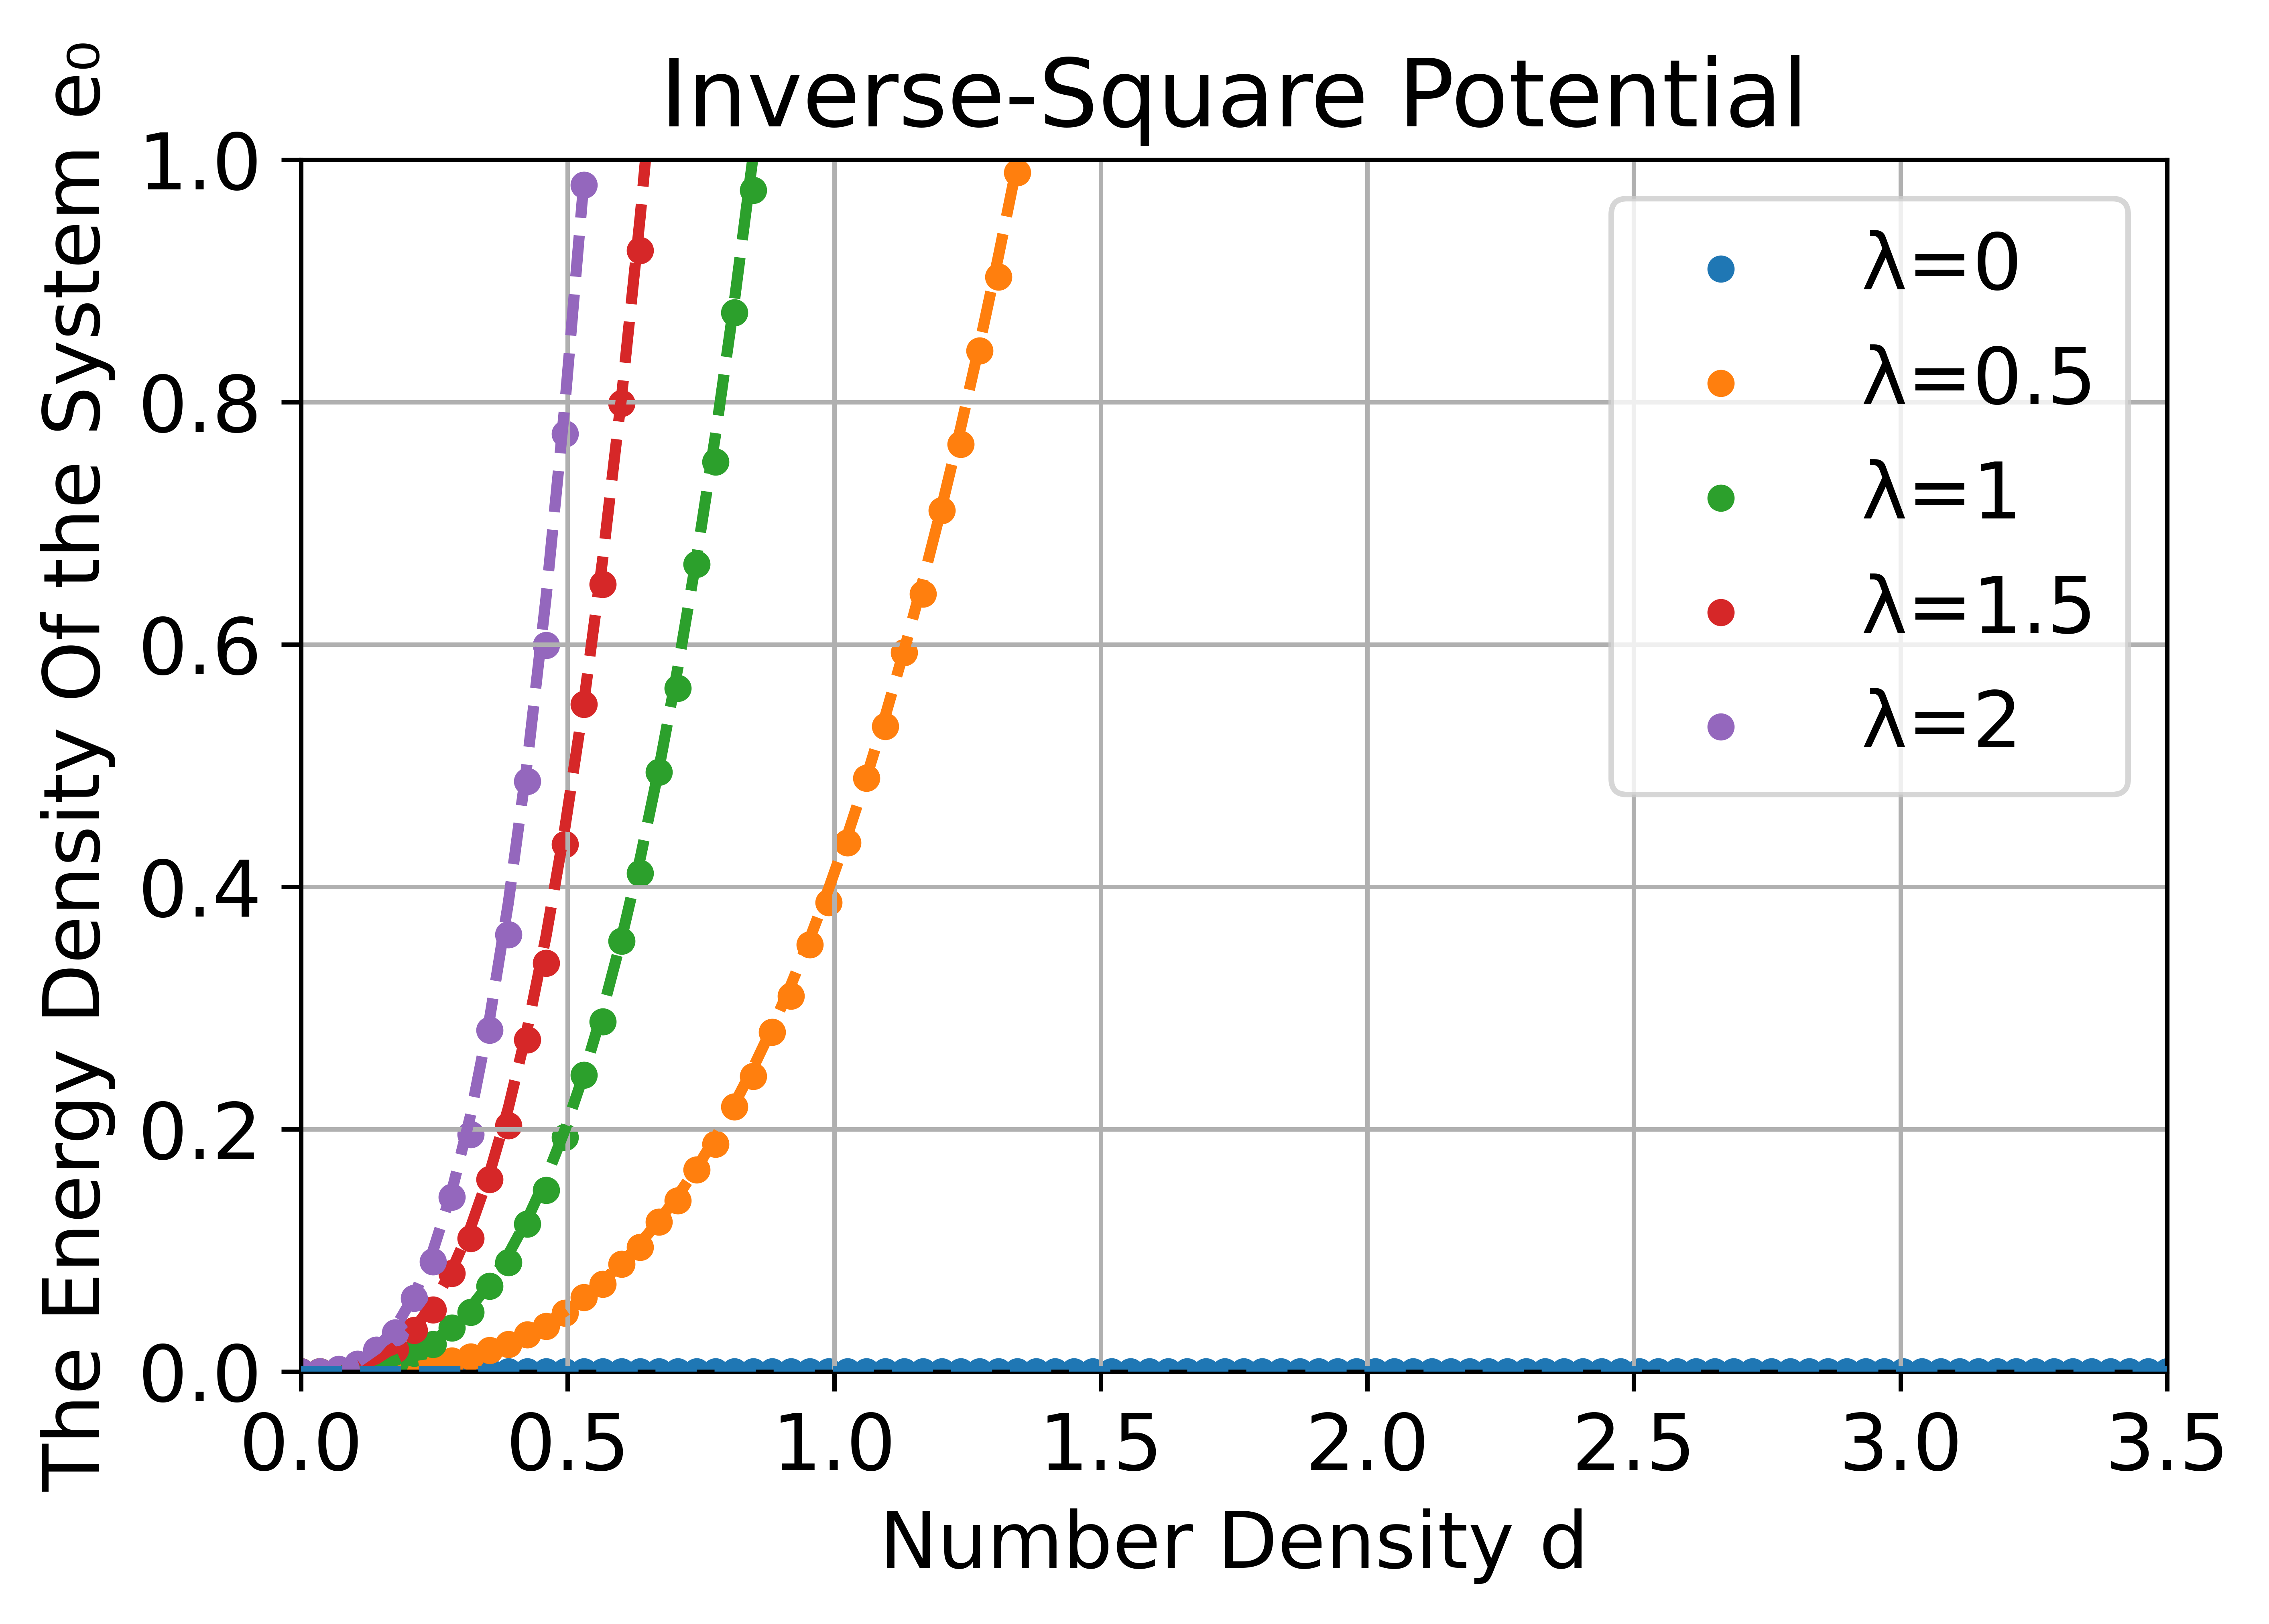

In [10]:
plt.figure(dpi=1000)
plt.rcParams['font.size'] = '14'
plt.xlabel('Number Density d')
plt.ylabel('The Energy Density Of the System e₀')
plt.title('Inverse-Square Potential')

for i in range(np.size(λs)):
    plt.scatter(densities, e0[i], label = "λ=%g"%λs[i], s = 15)
    
for i in λs:
    λ = i
    if i != λs[0]:
        plt.plot(densities, solution(densities), linewidth = 2, linestyle = 'dashed')
    else:
        plt.plot(densities, solution(densities), linewidth = 2, linestyle = 'dashed', zorder = 10)

plt.grid()
plt.legend()
plt.xlim(0, 3.5)
plt.ylim(0,1)
plt.show()

Plotting lambda vs k

53


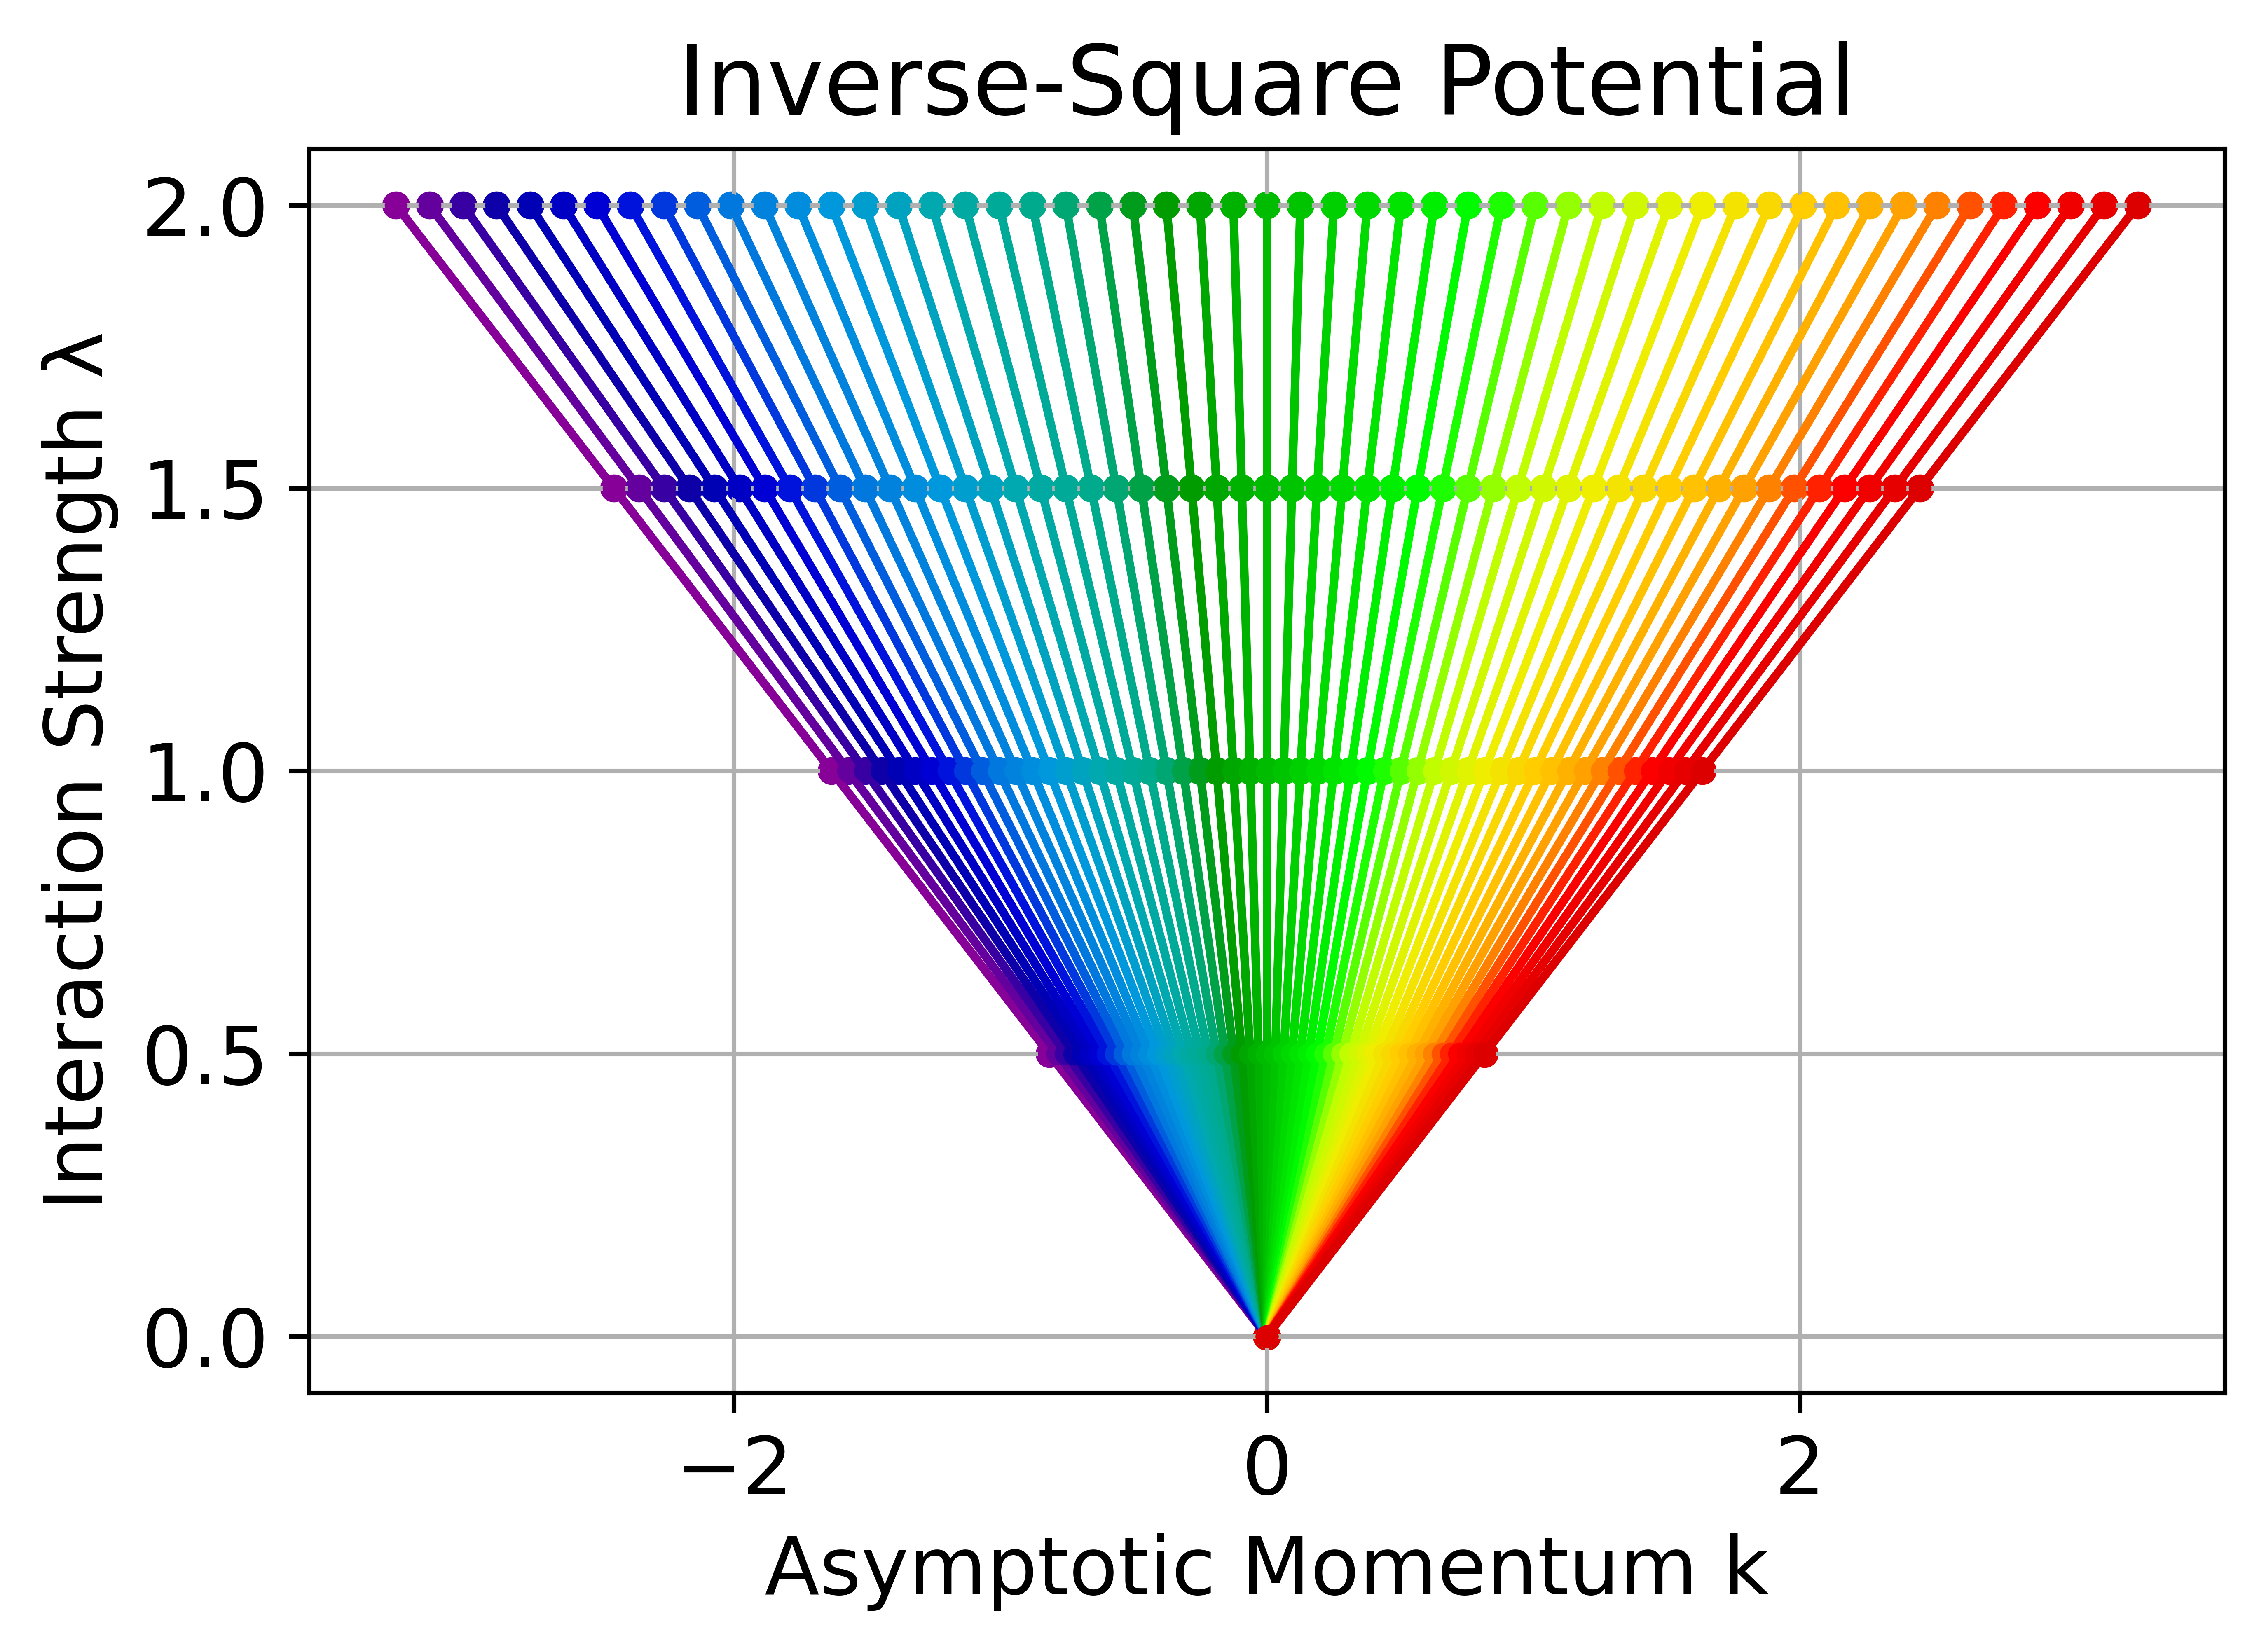

In [12]:
plt.figure(dpi=1000)
plt.yticks(λs)
plt.xlabel('Asymptotic Momentum k')
plt.ylabel('Interaction Strength λ')
plt.title('Inverse-Square Potential')
numberOfParticles = int ((densities*boxSize)[15])
print(numberOfParticles)

colourmap = plt.cm.nipy_spectral
colours = colourmap(np.linspace(0.1, 0.9, numberOfParticles))

ksplot = np.array(np.transpose(ks), dtype = "object")
plotting = np.zeros((np.size(λs), numberOfParticles))

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
for i in range(np.size(λs)):
    plotting[i] = ksplot[15][i]

for i in range(int(np.size(plotting)/np.size(λs))):
    plt.scatter(plotting[:, i], λs, color = colours[i], marker = "o", s=15)
    plt.plot(plotting[:, i], λs, color = colours[i], marker = "o", ms=3)
    
plt.grid()
plt.show()



Exact density of momentum states ρ(k) in thermodynamic limit

In [6]:
def densOfMomStates(x):
    return 1/(2*np.pi*x)

Density of momentum states ρ(k) plots

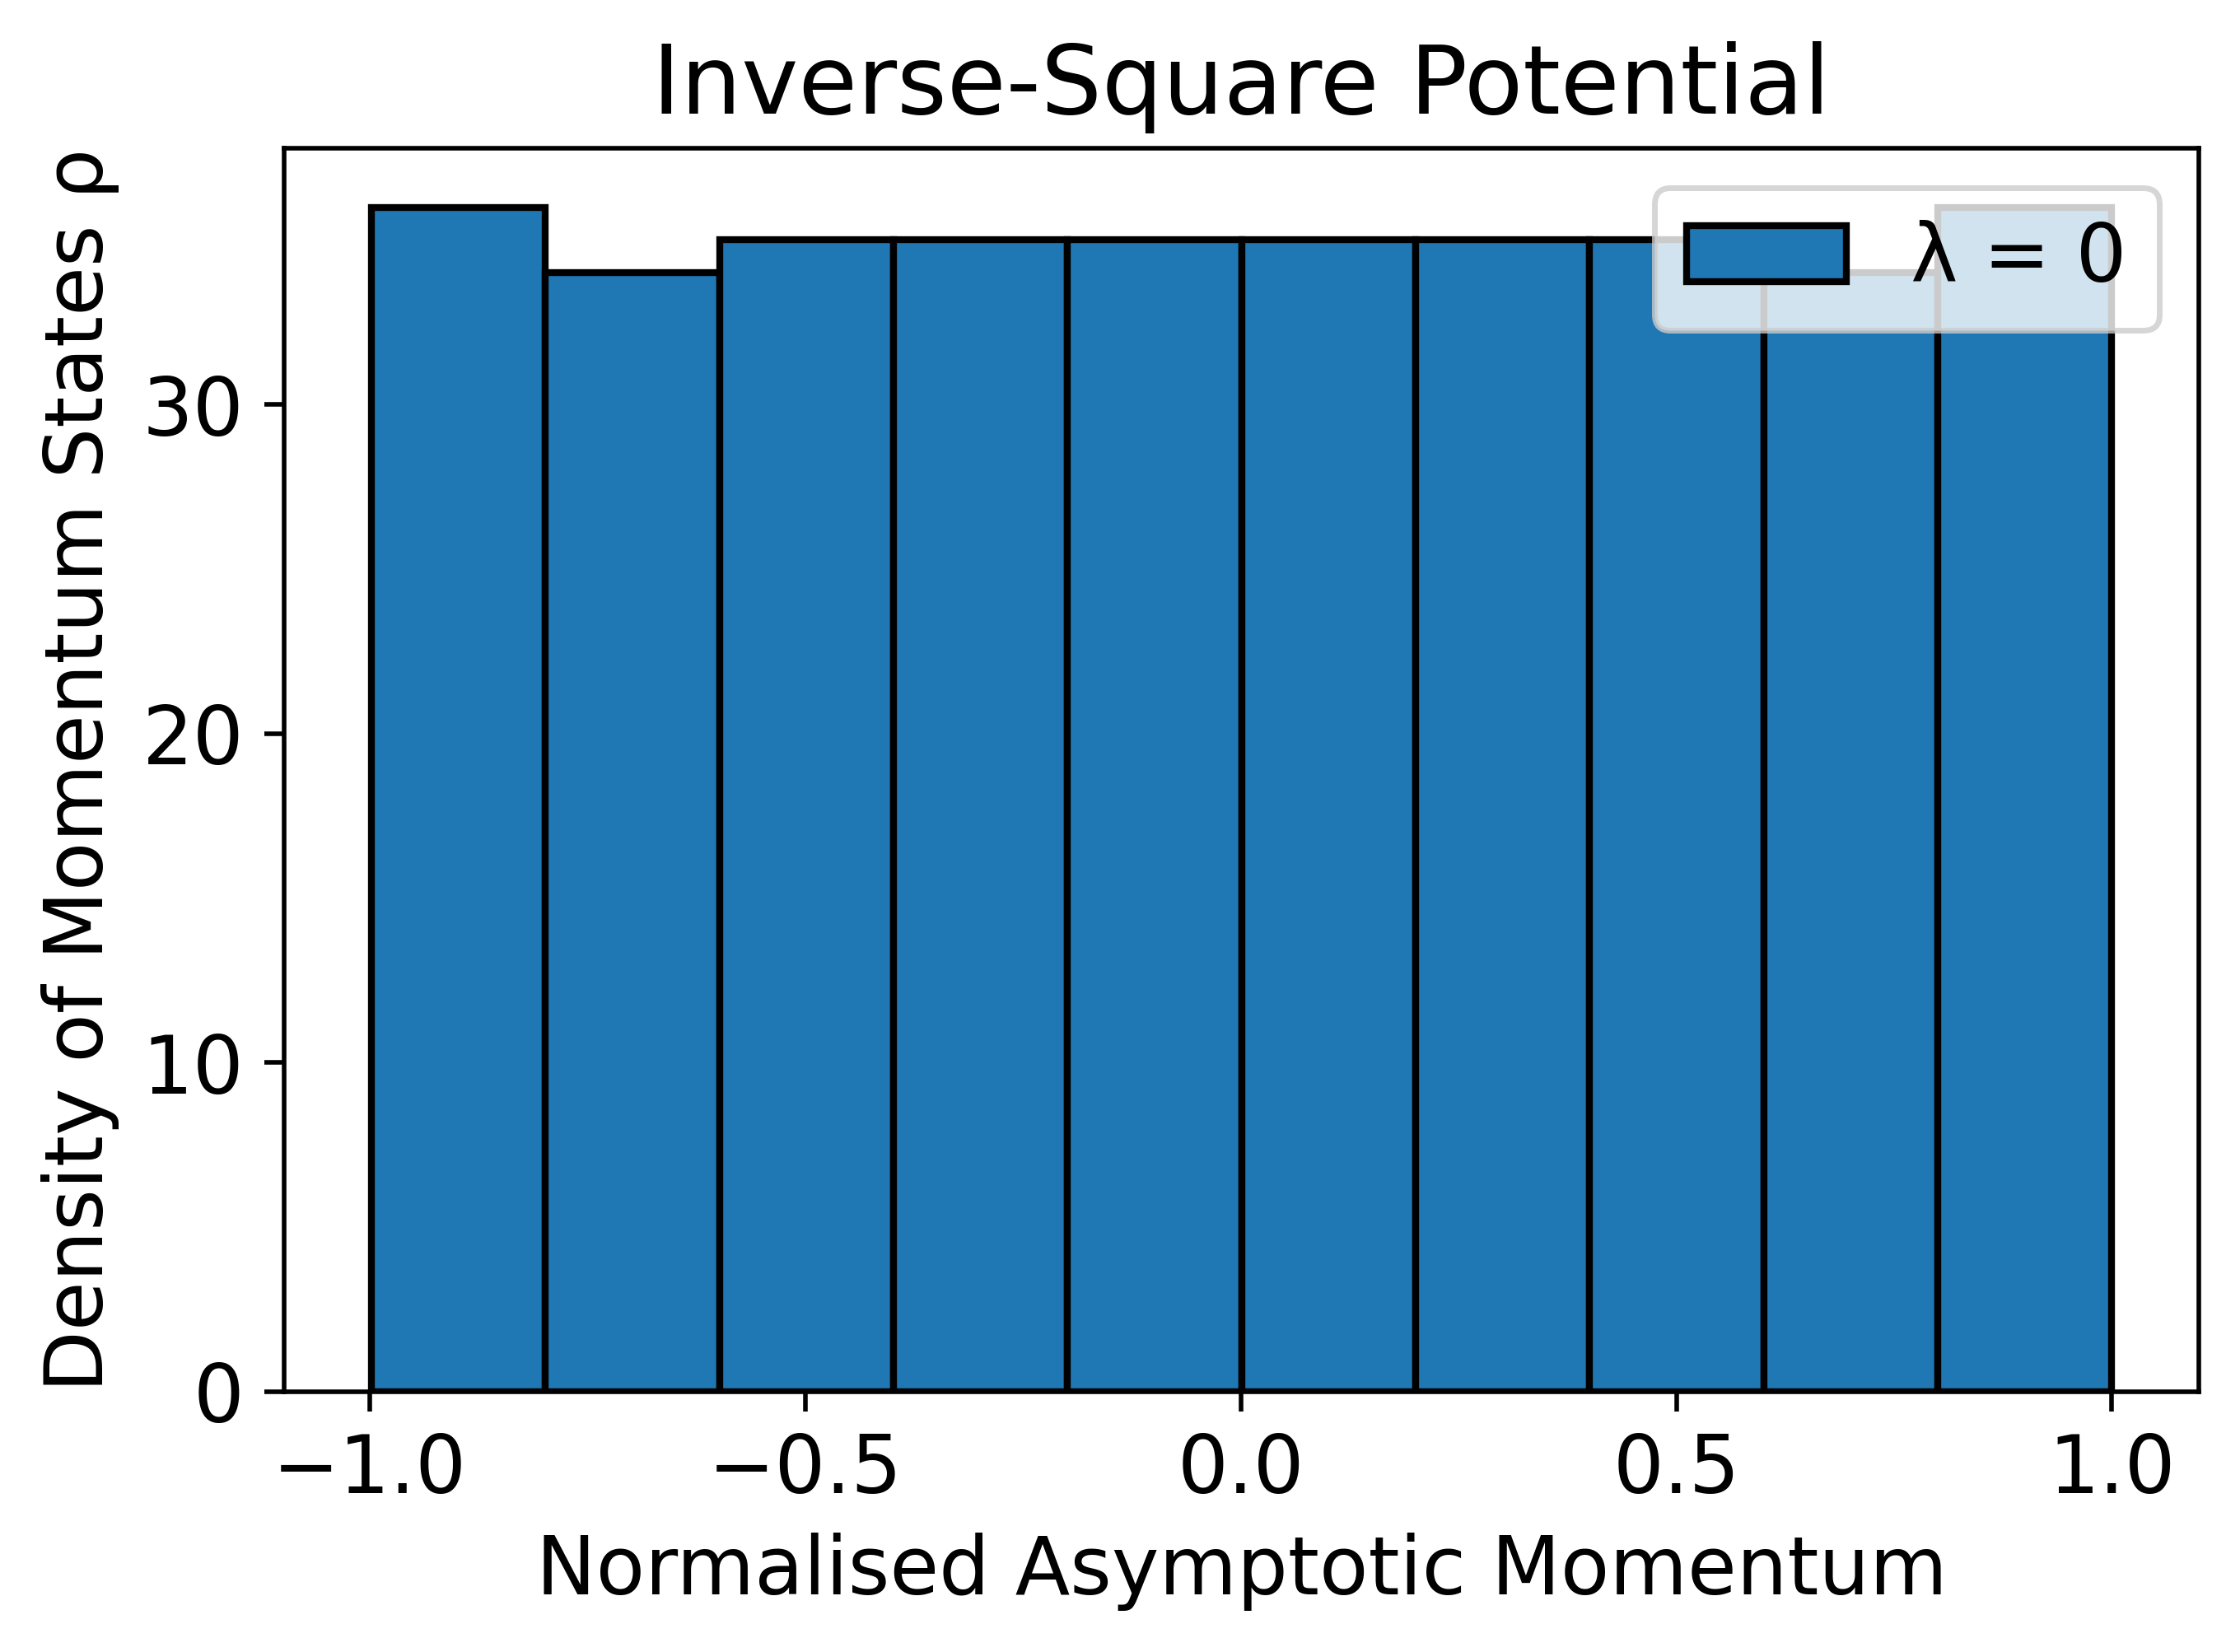

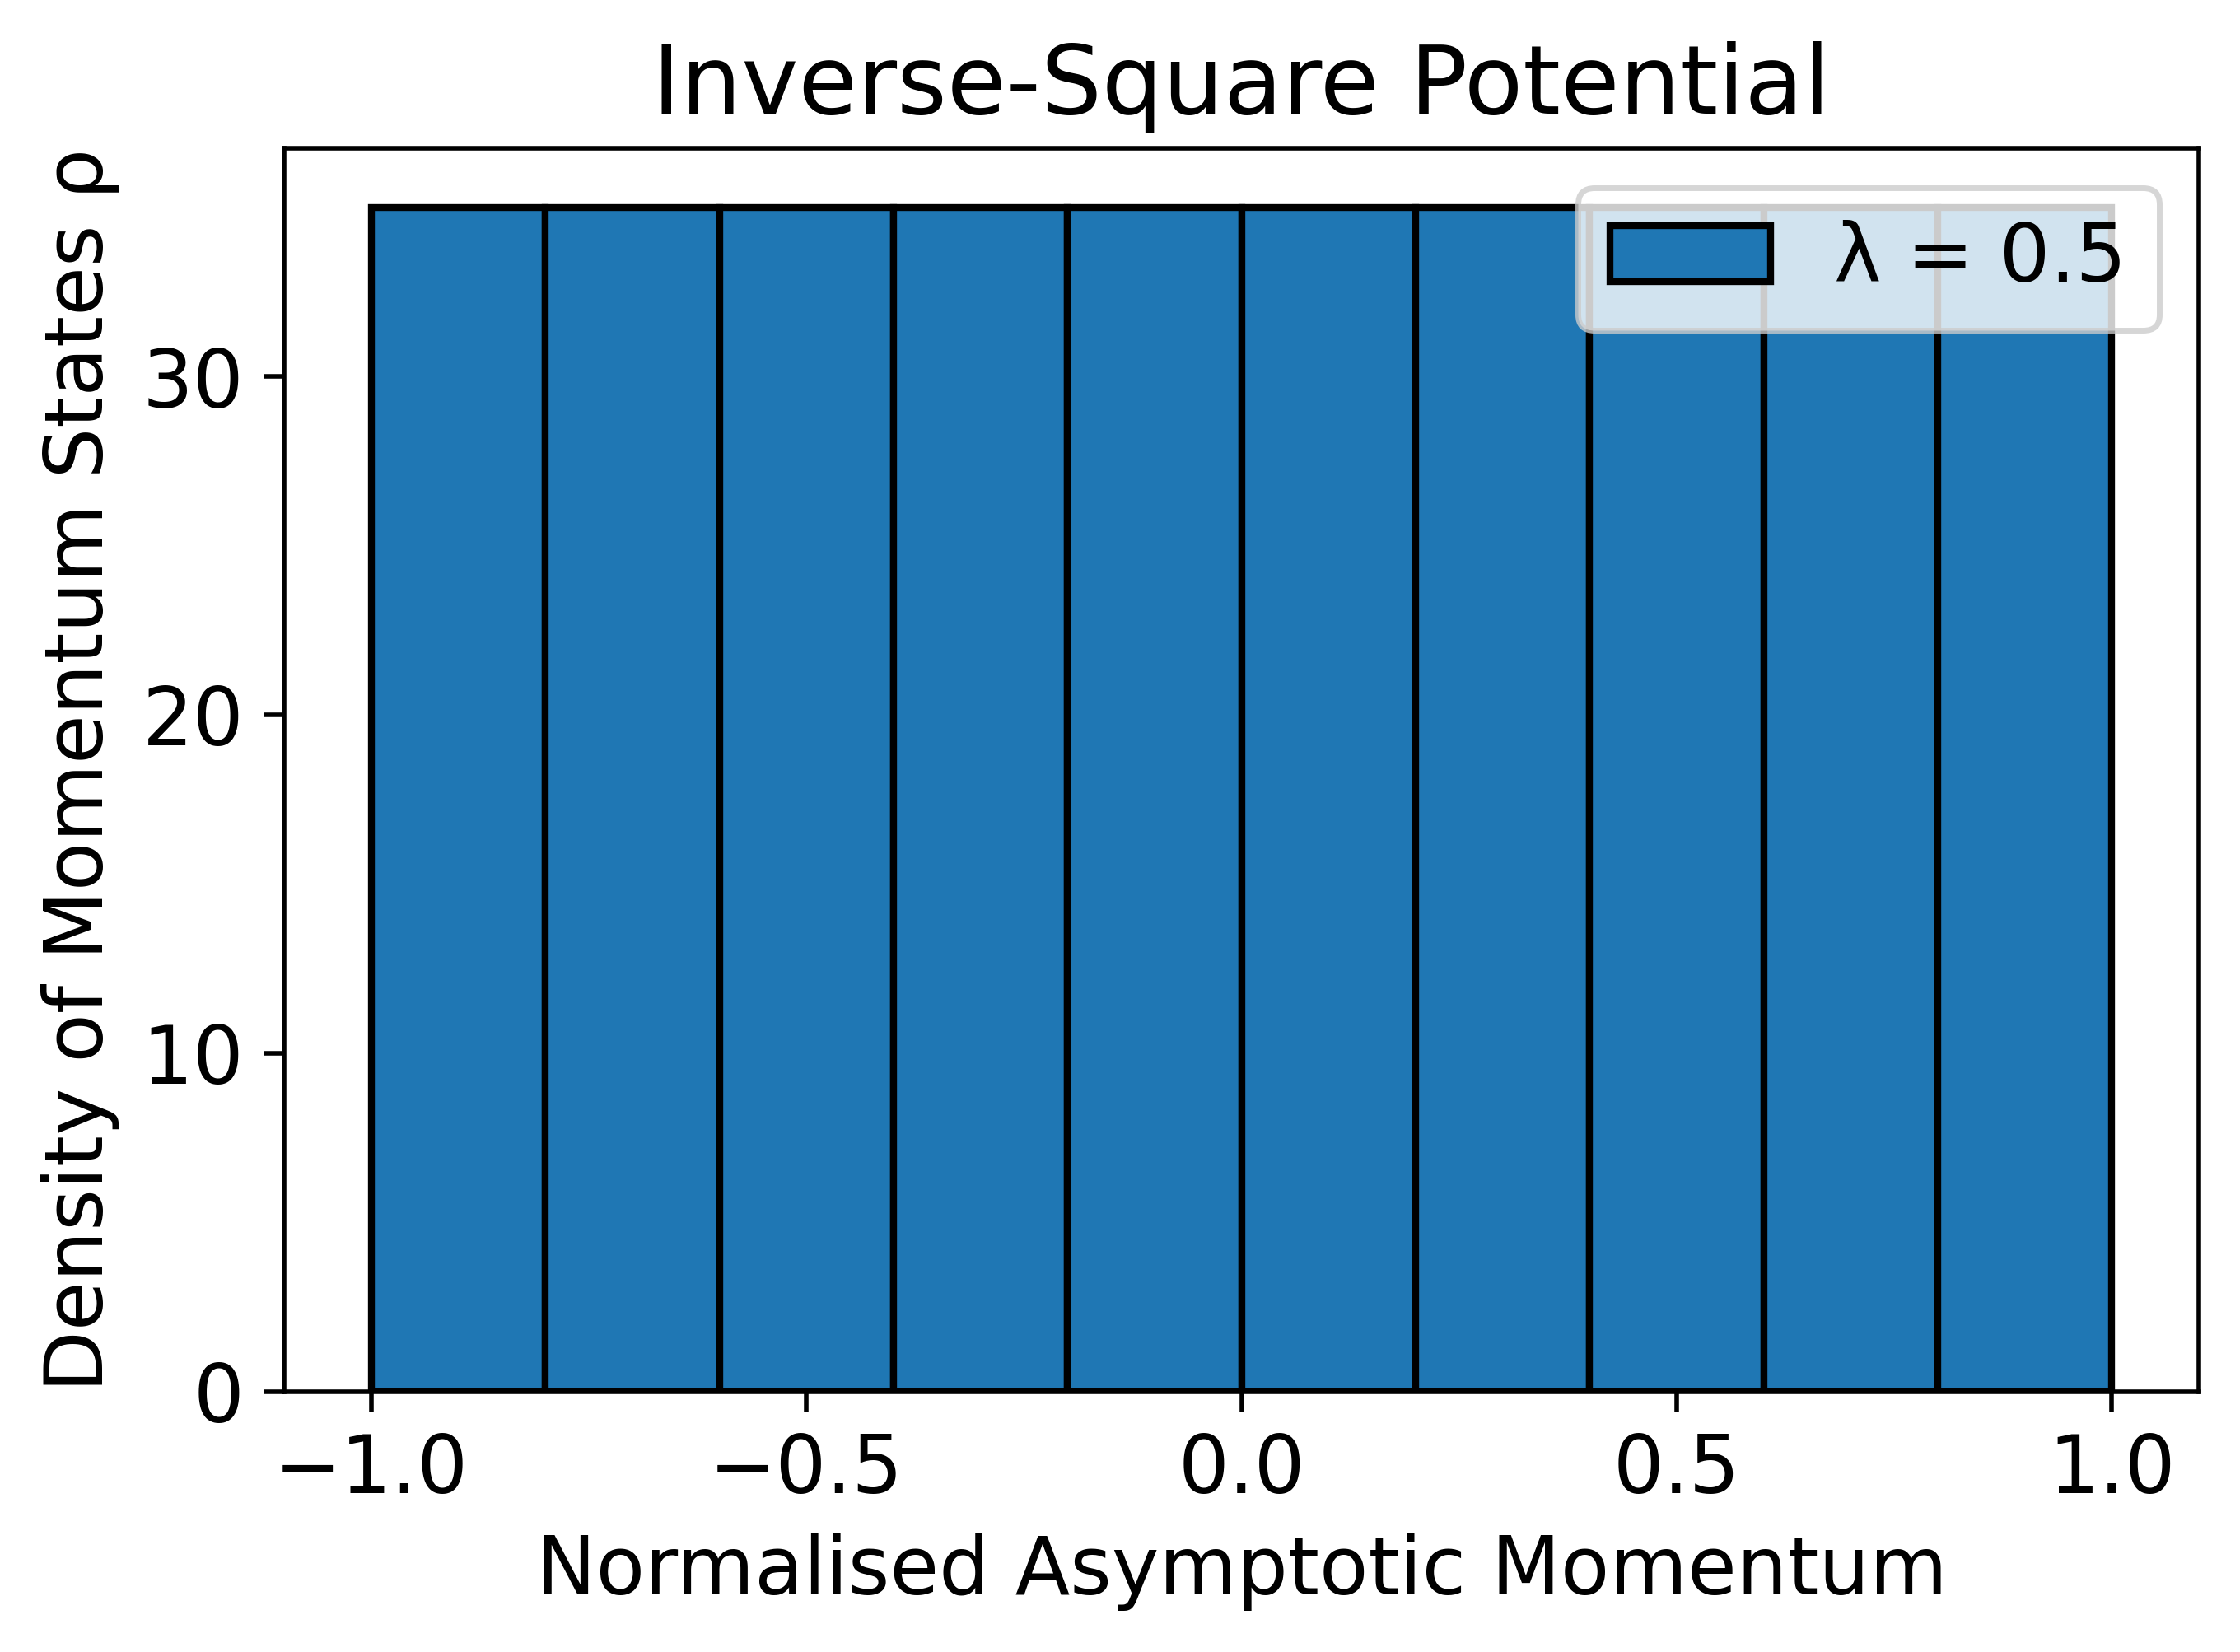

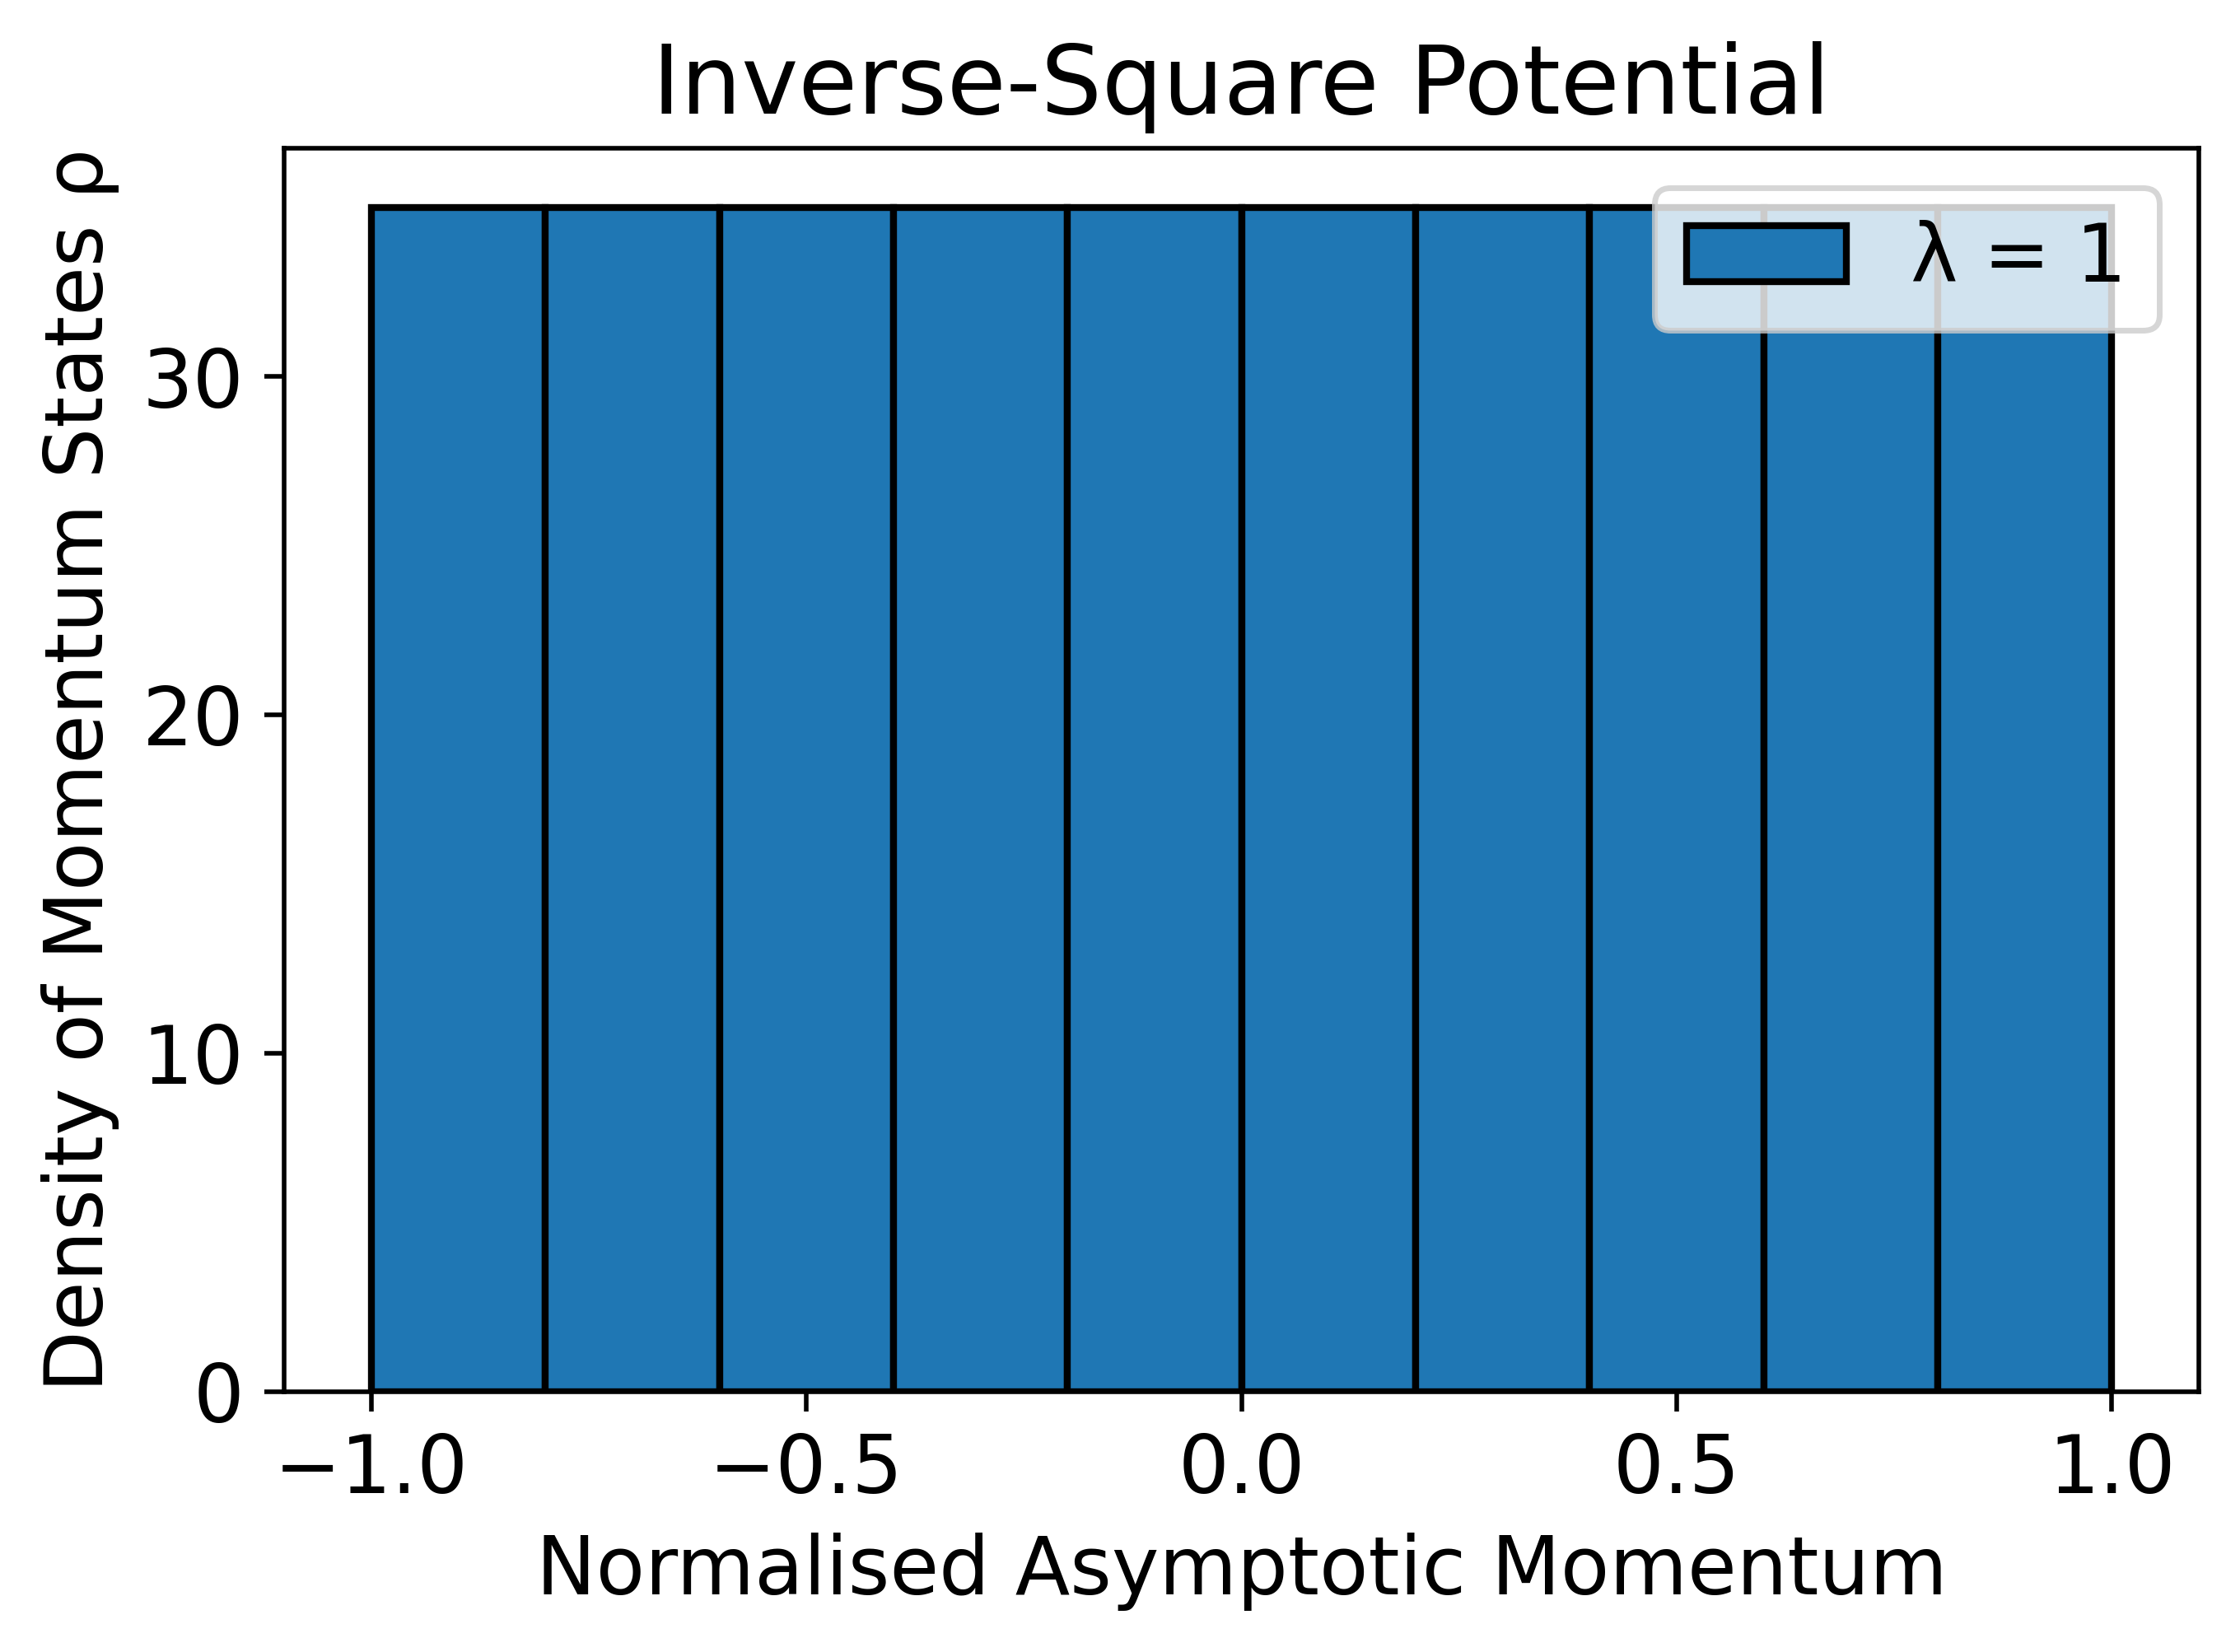

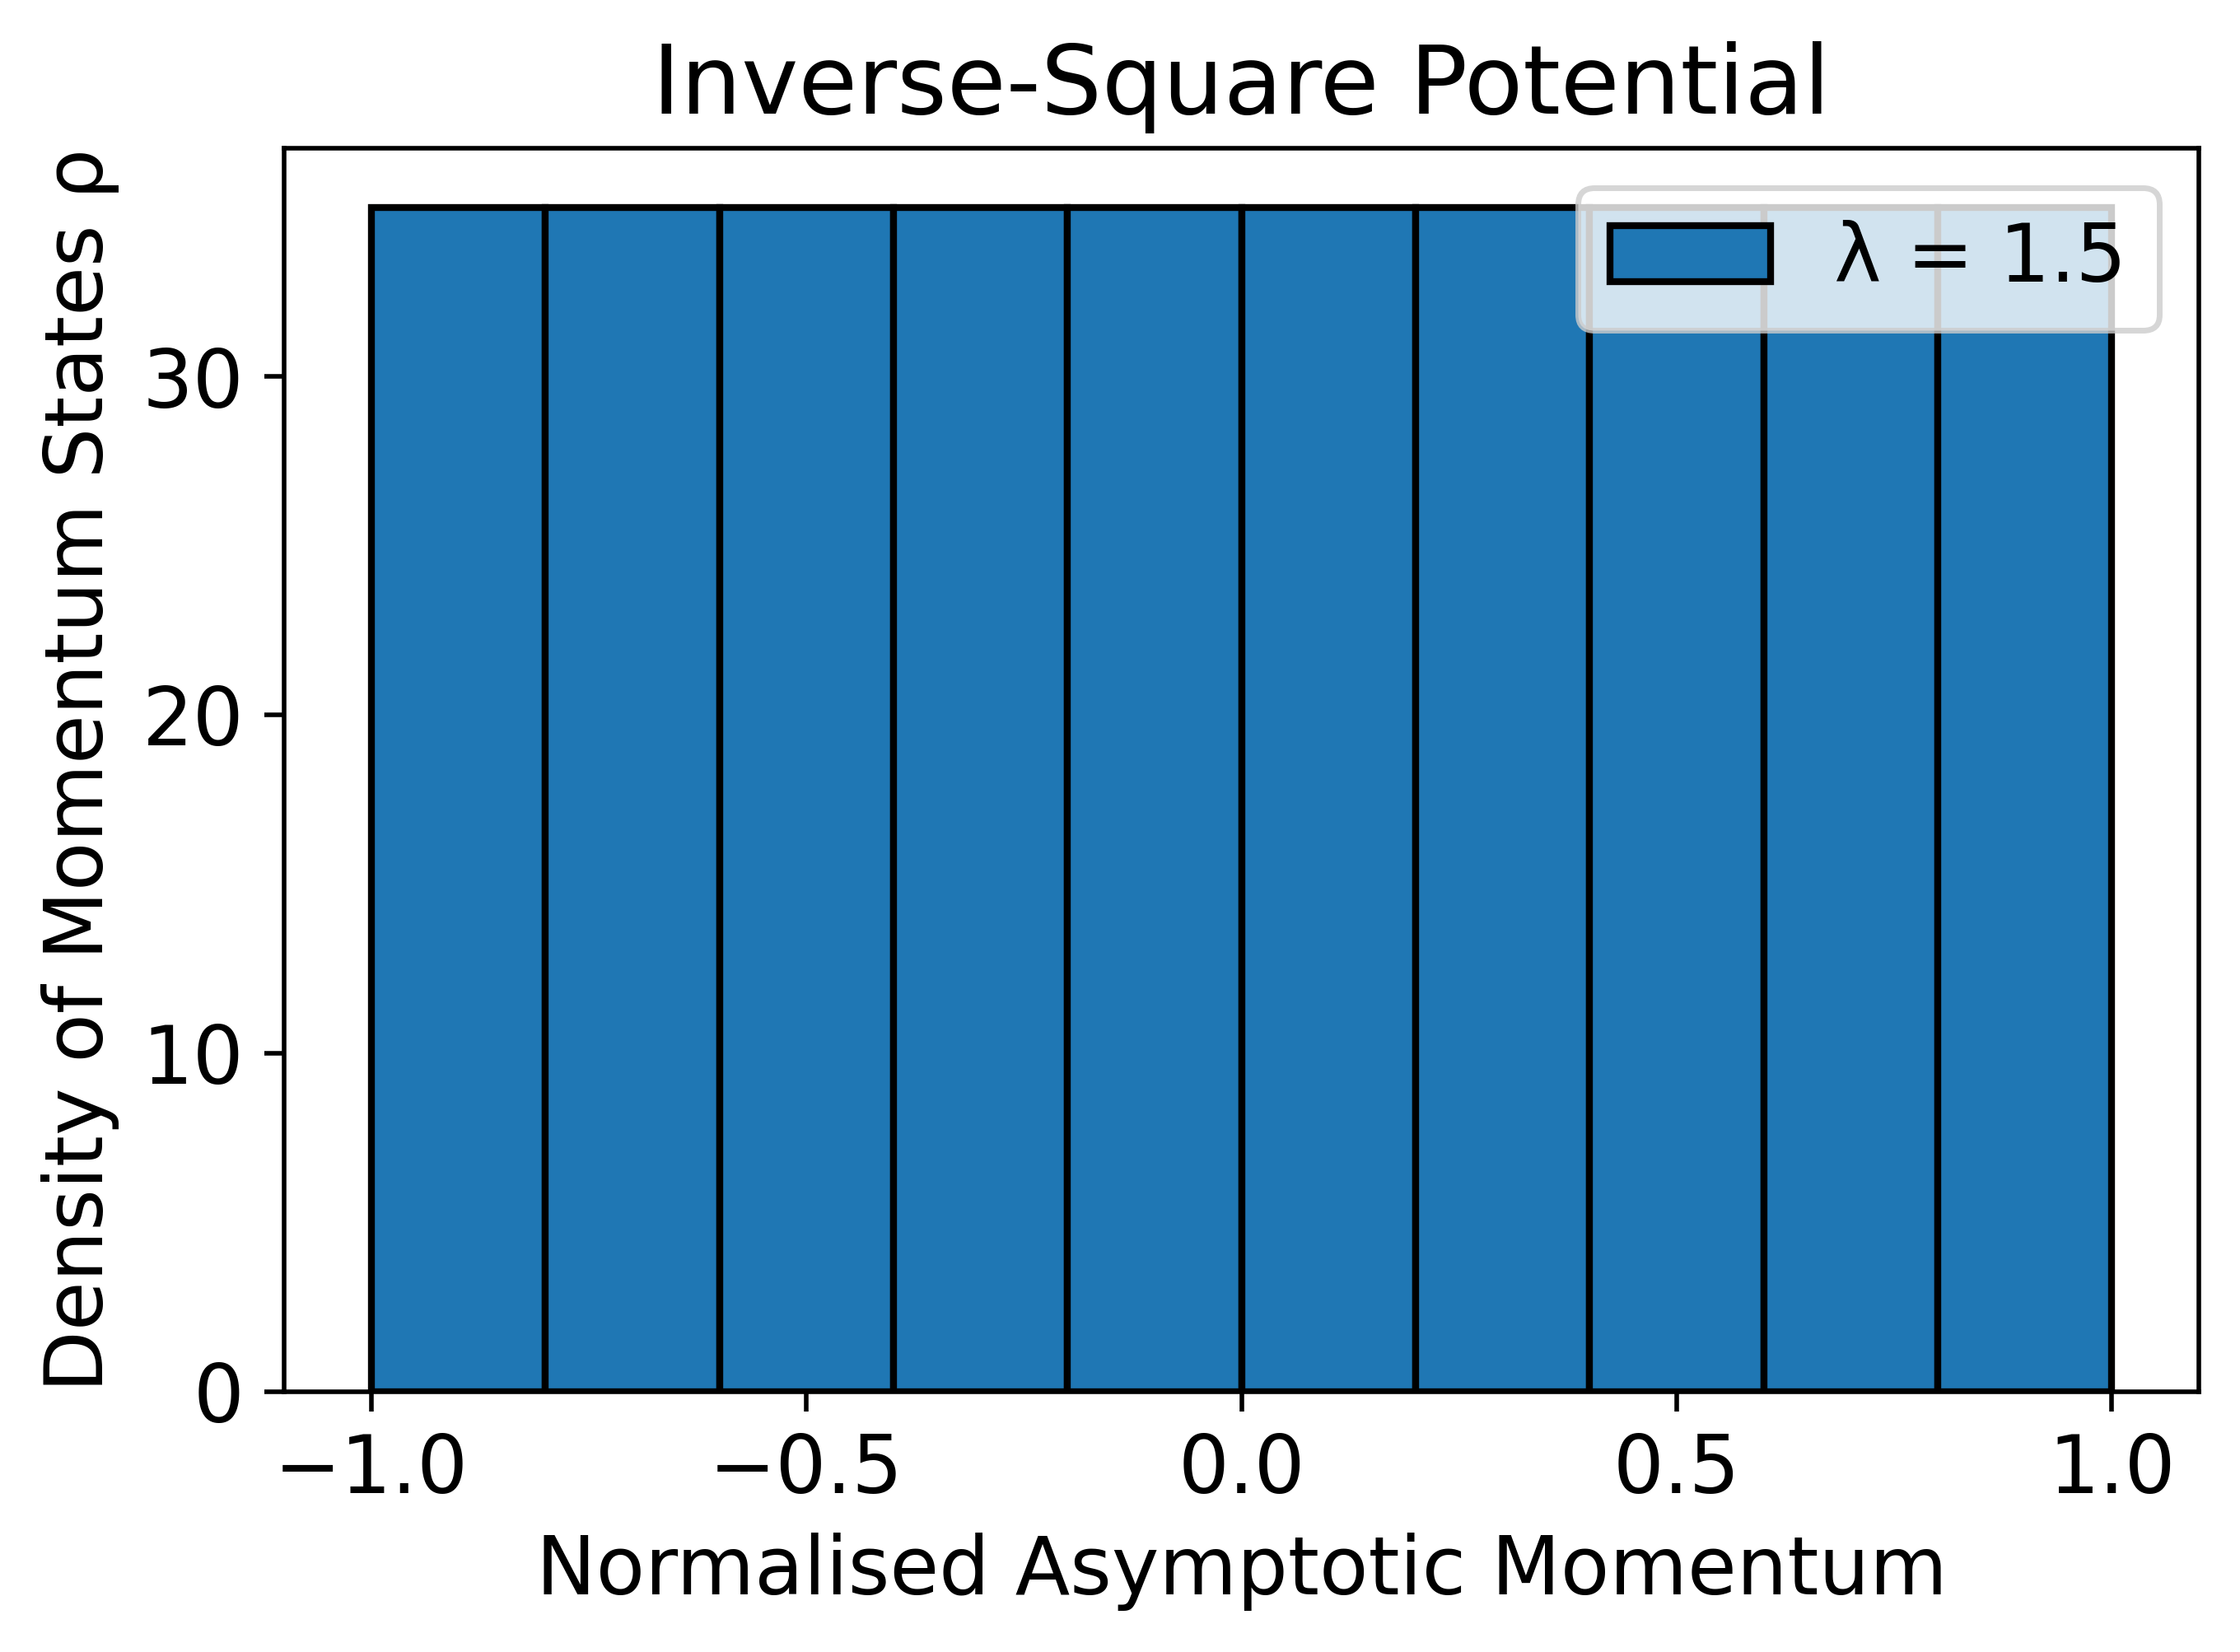

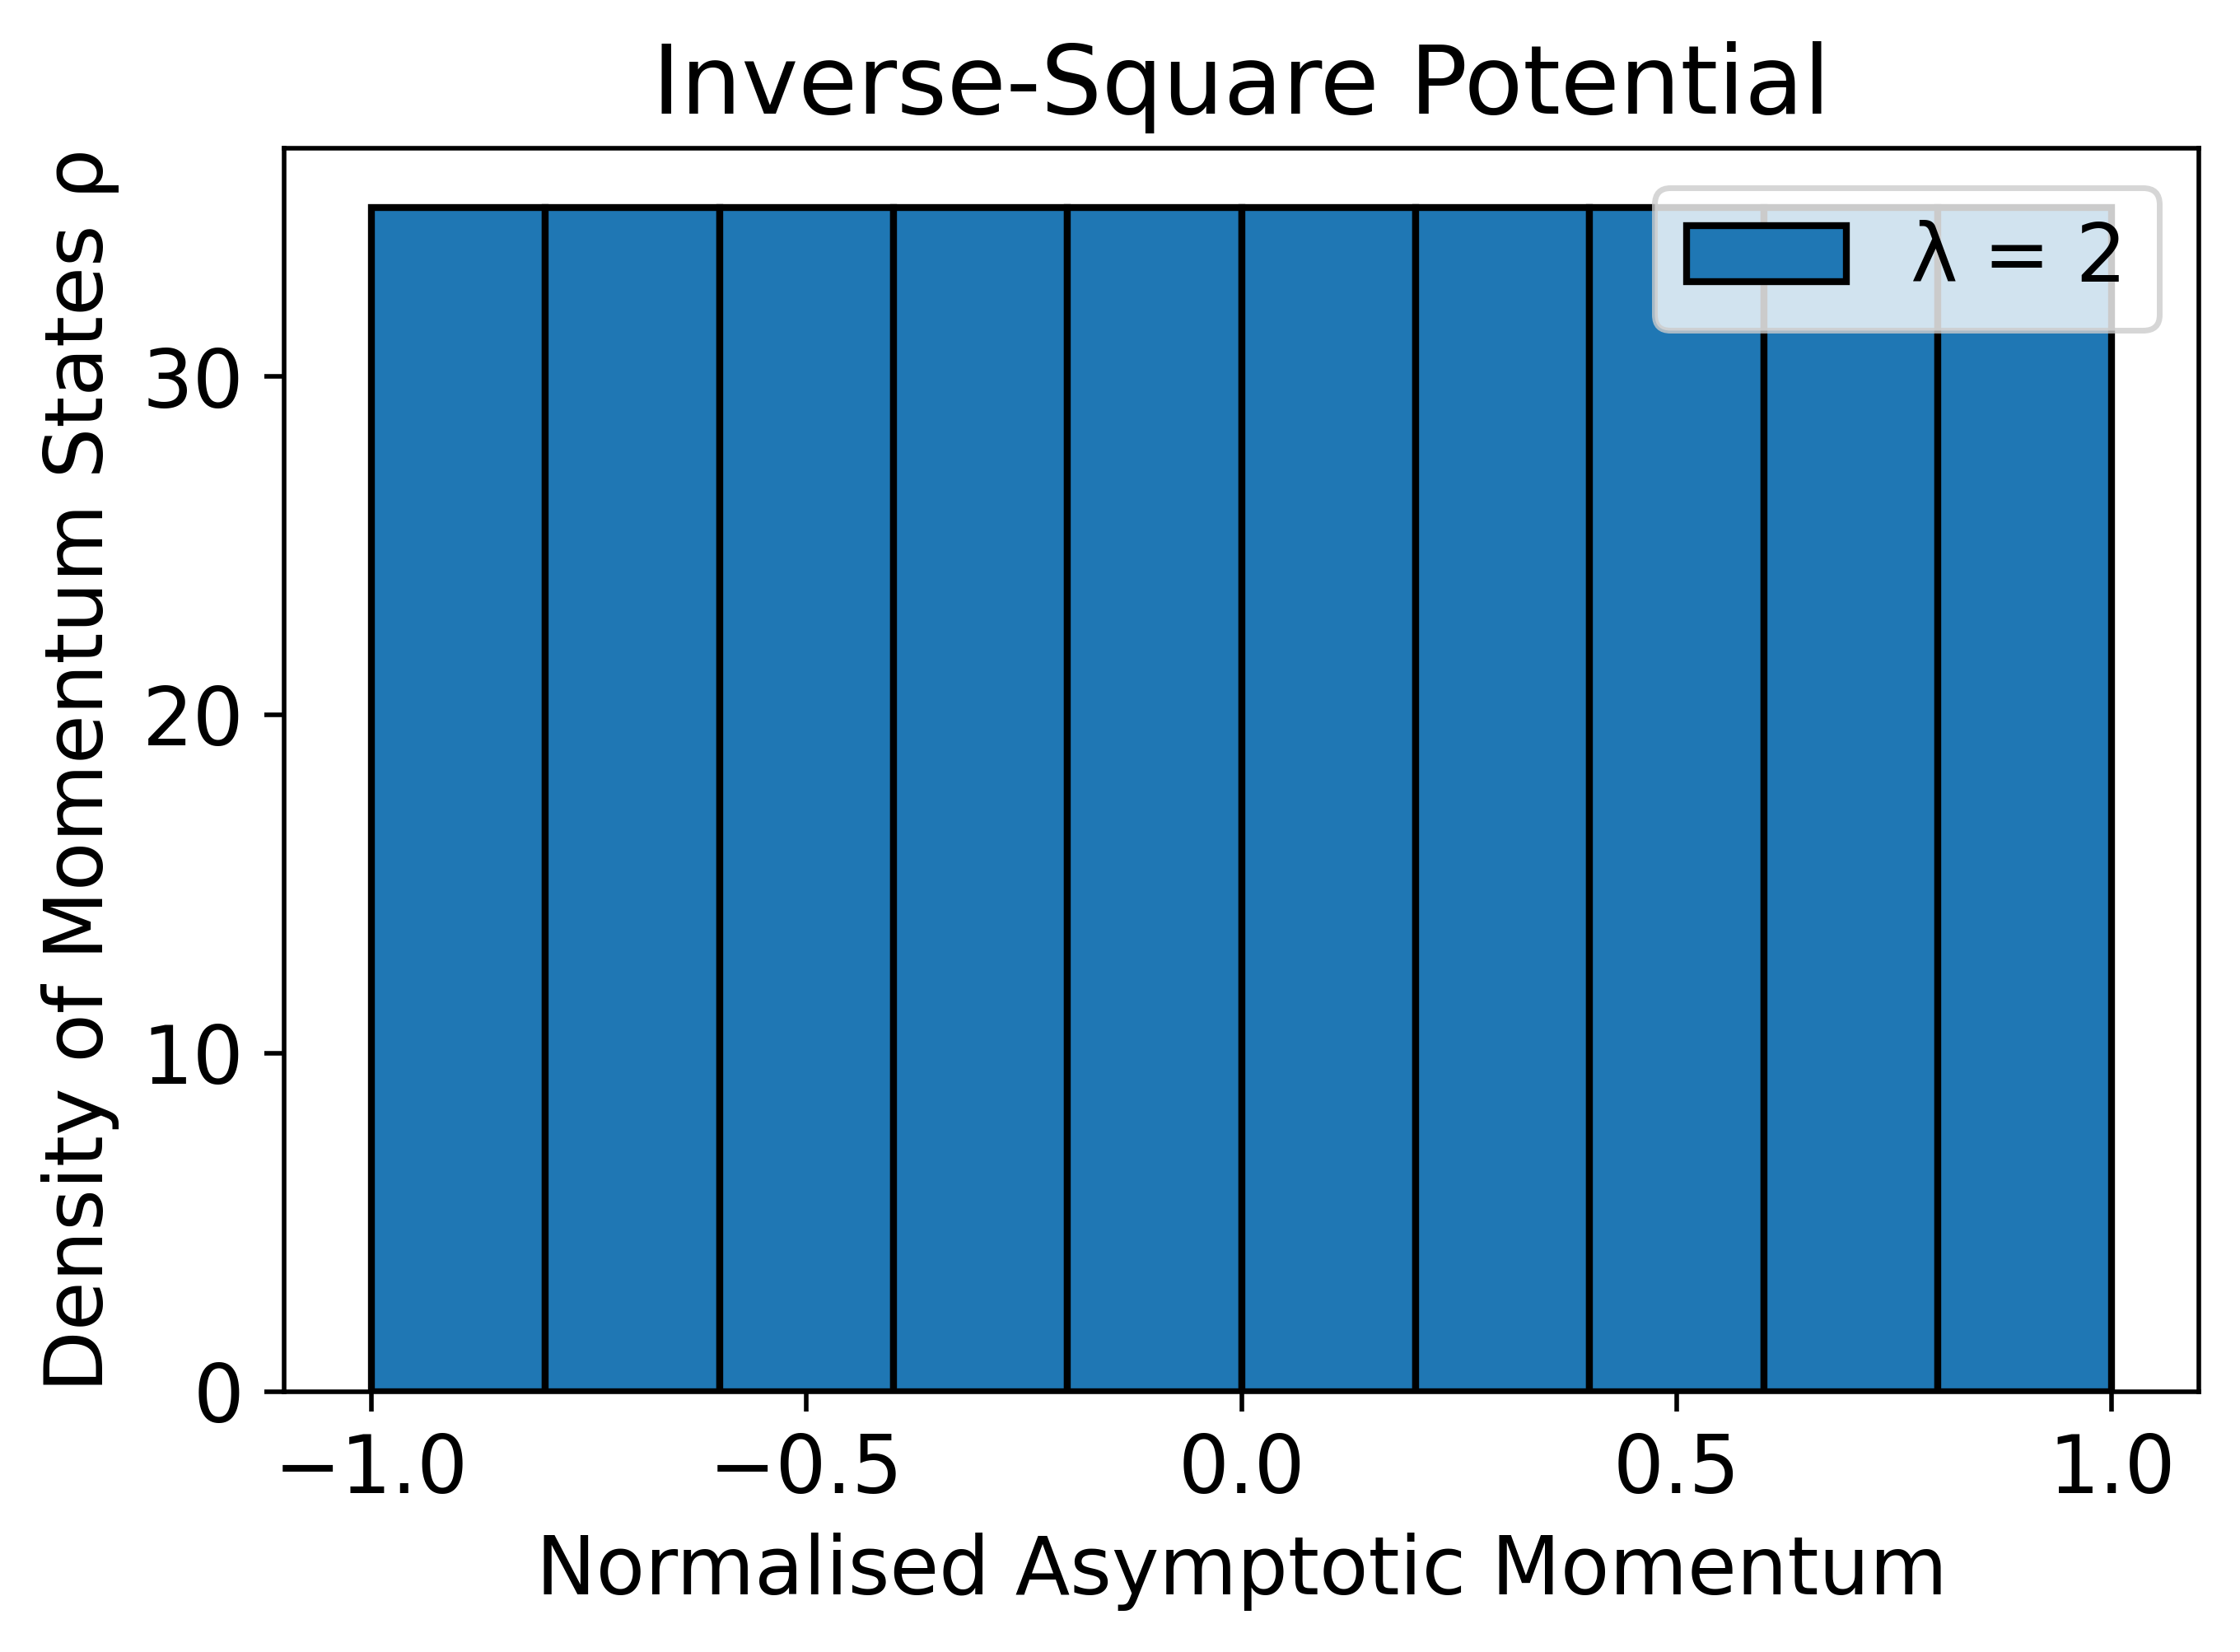

In [7]:
flattened_ks0 = np.hstack(normks[0][-1])
flattened_ks1 = np.hstack(normks[1][-1])
flattened_ks2 = np.hstack(normks[2][-1])
flattened_ks3 = np.hstack(normks[3][-1])
flattened_ks4 = np.hstack(normks[4][-1])

flattened_ks = np.array([flattened_ks0, flattened_ks1, flattened_ks2, flattened_ks3, flattened_ks4])

for i in range(np.size(λs)):
    plt.figure(dpi=500)
    plt.xlabel('Normalised Asymptotic Momentum')
    plt.ylabel('Density of Momentum States ρ')
    plt.title('Inverse-Square Potential')
    plt.hist(flattened_ks[i], density = False, bins = 'auto', label = "λ = %g"%λs[i], edgecolor = 'black', linewidth = 1.2)
    plt.legend()
    plt.show()

# plt.figure(dpi=500)
# plt.xlabel('Normalised Asymptotic Momentum')
# plt.ylabel('Density of Momentum States ρ')
# plt.title('Bethe Ansatz for Inverse-Square Potential')
# plt.hist(flattened_ks1, density = False, bins = 'auto', label = "λ = %g"%λs[1], edgecolor = 'black', linewidth = 1.2)
# #plt.plot(kForPlots, 2*densOfMomStates(np.full(np.size(kForPlots), λs[1])), label = "Exact", ms = 1, linestyle = 'dashed', color = 'darkblue')
# plt.legend()
# #plt.xlim(-1, 1)
# #plt.ylim(0, 0.01)
# plt.show()

# plt.figure(dpi=500)
# plt.xlabel('Normalised Asymptotic Momentum')
# plt.ylabel('Density of Momentum States ρ')
# plt.title('Bethe Ansatz for Inverse-Square Potential')
# plt.hist(flattened_ks2, density = False, bins = 'auto', label = "λ = %g"%λs[2], edgecolor = 'black', linewidth = 1.2)
# #plt.plot(kForPlots, 2*densOfMomStates(np.full(np.size(kForPlots), λs[2])), label = "Exact", ms = 1, linestyle = 'dashed', color = 'darkblue')
# plt.legend()
# #plt.xlim(-1, 1)
# #plt.ylim(0, 0.2)
# plt.show()

# plt.figure(dpi=500)
# plt.xlabel('Normalised Asymptotic Momentum')
# plt.ylabel('Density of Momentum States ρ')
# plt.title('Bethe Ansatz for Inverse-Square Potential')
# plt.hist(flattened_ks3, density = False, bins = 'auto', label = "λ = %g"%λs[3], edgecolor = 'black', linewidth = 1.2)
# #plt.plot(kForPlots, densOfMomStates(np.full(np.size(kForPlots), λs[3])), label = "Exact", ms = 1, linestyle = 'dashed', color = 'darkblue')
# plt.legend()
# #plt.xlim(-1, 1)
# #plt.ylim(0, 0.2)
# plt.show()

# plt.figure(dpi=500)
# plt.xlabel('Normalised Asymptotic Momentum')
# plt.ylabel('Density of Momentum States ρ')
# plt.title('Bethe Ansatz for Inverse-Square Potential')
# plt.hist(flattened_ks4, density = False, bins = 'auto', label = "λ = %g"%λs[4], edgecolor = 'black', linewidth = 1.2)
# #plt.plot(kForPlots, densOfMomStates(np.full(np.size(kForPlots), λs[4])), label = "Exact", ms = 1, linestyle = 'dashed', color = 'darkblue')
# plt.legend()
# #plt.xlim(-1, 1)
# #plt.ylim(0, 0.2)
# plt.show()

# #plt.xlim(-1, 1)
# #plt.ylim(0, 10)
# #plt.show()